**Importing the Modules**

In [1]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics
from sklearn import tree

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

#cross validation
# from sklearn.cross_validation import train_test_split IS NOW DEPRECATED
from sklearn.model_selection import train_test_split

**Import the data**

In [2]:
#function imports a CSV file to DataFrame format
rawData = pd.read_csv('creditone_data.csv', header = 0)

#method is used to return top n (5 by default) rows of a data frame or series
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STS
0,1.0,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2.0,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3.0,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4.0,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5.0,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


*Sample of five rows with **25** attributes*

In [3]:
#used to replace a string, regex, list, dictionary, series, number etc. from a dataframe
cleanup = {"SEX": {"male": 1, "female": 2},
           "EDUCATION": {"graduate school": 1, "university": 2, "high school": 3, "other": 0, "other": 4, "other": 5, "other": 6,},
           "DEFAULT_STS": {"not default":0, "default":1}}

rawData.replace(cleanup, inplace=True)

#method is used to return top n (5 by default) rows of a data frame or series
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STS
0,1.0,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2.0,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3.0,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4.0,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5.0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
rawData.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STS
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.873467,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.866226,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
#print a concise summary of a DataFrame
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           30000 non-null  float64
 1   LIMIT_BAL    30000 non-null  int64  
 2   SEX          30000 non-null  int64  
 3   EDUCATION    30000 non-null  int64  
 4   MARRIAGE     30000 non-null  int64  
 5   AGE          30000 non-null  int64  
 6   PAY_1        30000 non-null  int64  
 7   PAY_2        30000 non-null  int64  
 8   PAY_3        30000 non-null  int64  
 9   PAY_4        30000 non-null  int64  
 10  PAY_5        30000 non-null  int64  
 11  PAY_6        30000 non-null  int64  
 12  BILL_AMT1    30000 non-null  int64  
 13  BILL_AMT2    30000 non-null  int64  
 14  BILL_AMT3    30000 non-null  int64  
 15  BILL_AMT4    30000 non-null  int64  
 16  BILL_AMT5    30000 non-null  int64  
 17  BILL_AMT6    30000 non-null  int64  
 18  PAY_AMT1     30000 non-null  int64  
 19  PAY_

**Correlation**

In [6]:
corr_mat = rawData.corr()
print(corr_mat)

                   ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID           1.000000   0.026179  0.018497   0.043001 -0.029079  0.018678   
LIMIT_BAL    0.026179   1.000000  0.024755  -0.194773 -0.108139  0.144713   
SEX          0.018497   0.024755  1.000000   0.014144 -0.031389 -0.090874   
EDUCATION    0.043001  -0.194773  0.014144   1.000000 -0.130576  0.159366   
MARRIAGE    -0.029079  -0.108139 -0.031389  -0.130576  1.000000 -0.414170   
AGE          0.018678   0.144713 -0.090874   0.159366 -0.414170  1.000000   
PAY_1       -0.030575  -0.271214 -0.057643   0.089635  0.019917 -0.039447   
PAY_2       -0.011215  -0.296382 -0.070771   0.102000  0.024199 -0.050148   
PAY_3       -0.018494  -0.286123 -0.066096   0.095368  0.032688 -0.053048   
PAY_4       -0.002735  -0.267460 -0.060173   0.091285  0.033122 -0.049722   
PAY_5       -0.022199  -0.249411 -0.055064   0.081214  0.035629 -0.053826   
PAY_6       -0.020270  -0.235195 -0.044008   0.066257  0.034345 -0.048773   

**Covariance**

In [7]:
covMat = rawData.cov()
print(covMat)

                       ID     LIMIT_BAL          SEX     EDUCATION  \
ID           7.500250e+07  2.941664e+07    78.356379    322.585586   
LIMIT_BAL    2.941664e+07  1.683446e+10  1571.050630 -21890.657394   
SEX          7.835638e+01  1.571051e+03     0.239247      0.005993   
EDUCATION    3.225856e+02 -2.189066e+04     0.005993      0.750348   
MARRIAGE    -1.314525e+02 -7.323670e+03    -0.008014     -0.059039   
AGE          1.491057e+03  1.730767e+05    -0.409726      1.272508   
PAY_1       -2.975726e+02 -3.954593e+04    -0.031685      0.087256   
PAY_2       -1.162770e+02 -4.603765e+04    -0.041442      0.105778   
PAY_3       -1.916922e+02 -4.443225e+04    -0.038694      0.098873   
PAY_4       -2.769132e+01 -4.057181e+04    -0.034411      0.092448   
PAY_5       -2.178600e+02 -3.667056e+04    -0.030521      0.079719   
PAY_6       -2.018774e+02 -3.509308e+04    -0.024754      0.066002   
BILL_AMT1    1.236447e+07  2.727020e+09 -1211.694332   1573.544321   
BILL_AMT2    1.10839

**Selecting Data**


*Define the features and the dependent variable*

In [8]:
#features
X = rawData.iloc[:,2:]
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STS
0,2,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,2,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
#dependent variable
y = rawData['LIMIT_BAL']
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


**MODELING FORMAT**

In [10]:
#prepare each regression algorithm
algosClass = []
algosClass.append(('Random Forest Regressor', RandomForestRegressor()))
algosClass.append(('Linear Regression', LinearRegression()))
algosClass.append(('Support Vector Regression', SVR()))

In [11]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [12]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.46725156051950173
Linear Regression 0.34209654159242003
Support Vector Regression -0.05035048360570782


In [13]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 123)

In [14]:
#modeling
algo_rf = RandomForestRegressor()
model_rf = algo_rf.fit(X_train,y_train)

#Make Predictions
pred_rf = model_rf.predict(X_test)
pred_rf

array([193600., 109000., 202500., ...,  29200., 179800.,  42300.])

In [15]:
predRsq_rf = r2_score(y_test,pred_rf)
print('R Squared: %.3f' % predRsq_rf)

rmse_rf = sqrt(mean_squared_error(y_test, pred_rf))
print('RMSE: %.3f' % rmse_rf)

R Squared: 0.467
RMSE: 93920.454


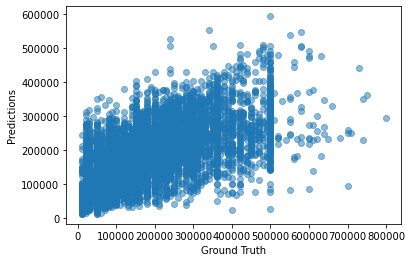

In [16]:
plt.scatter(y_test, pred_rf, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [17]:
#Modeling (Classification)
algo_dc = DecisionTreeClassifier()
model_dc = algo_dc.fit(X_train,y_train)

#Predictions 
pred_dc = model_dc.predict(X_test)
pred_dc #compare preds to y_test

array([100000, 110000, 300000, ...,  10000,  20000,  30000], dtype=int64)

In [18]:
accuracy_score(pred_dc, y_test)

0.1758888888888889

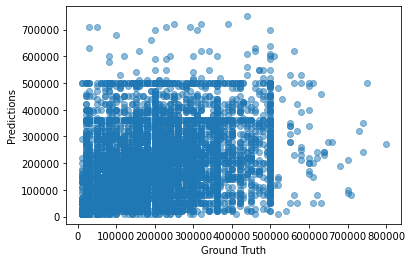

In [21]:
plt.scatter(y_test, pred_dc, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

**USE DEFAULT**

In [22]:
#features
X1 = rawData.iloc[:,1:24]
print('Summary of feature sample')
X1.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [23]:
#dependent variable
y1 = rawData['DEFAULT_STS']
print(y1)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT_STS, Length: 30000, dtype: int64


In [24]:
#regression
results1 = []
names1 = []
for name1, model1 in algosClass:
    result1 = cross_val_score(model1, X1,y1, cv=3, scoring='r2')
    names1.append(name1)
    results1.append(result1)

In [25]:
for i in range(len(names1)):
    print(names1[i],results1[i].mean())

Random Forest Regressor 0.18199625098983288
Linear Regression 0.1209614603526656
Support Vector Regression -0.08514449813302234


In [26]:
#Train/Test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .3, random_state = 123)

In [27]:
#modeling
algo_rf1 = RandomForestRegressor()
model_rf1 = algo_rf1.fit(X1_train,y1_train)

#Make Predictions
pred_rf1 = model_rf1.predict(X1_test)
pred_rf1

array([0.19, 0.09, 0.87, ..., 0.26, 0.36, 0.68])

In [28]:
predRsq_rf1 = r2_score(y1_test,pred_rf1)
print('R Squared: %.3f' % predRsq_rf1)

rmse_rf1 = sqrt(mean_squared_error(y1_test, pred_rf1))
print('RMSE: %.3f' % rmse_rf1)

R Squared: 0.172
RMSE: 0.375


In [29]:
#Modeling (Classification)
algo_dc1 = DecisionTreeClassifier(max_depth=3)
model_dc1 = algo_dc1.fit(X1_train,y1_train)

#Predictions 
pred_dc1 = model_dc1.predict(X1_test)
pred_dc1 #compare preds to y_test

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [30]:
accuracy_score(pred_dc1, y1_test)

0.8211111111111111

In [31]:
print(classification_report(y1_test, pred_dc1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.65      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [32]:
values = ['0:No','1:Yes'] #this is just a list specifying the region classes

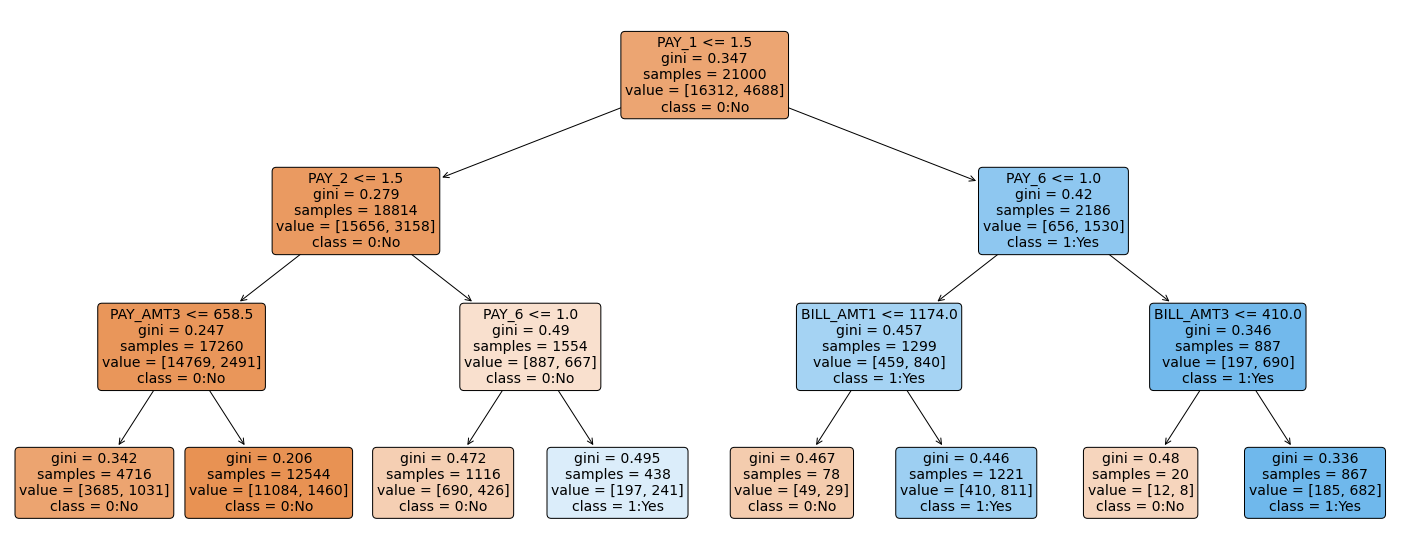

In [34]:
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

plt.figure(figsize=(25,10))
a = plot_tree(model_dc1,
             feature_names=X1.columns,
             class_names=values,
             filled=True,
             rounded=True,
             fontsize=14)

**USE EDUCATION**

In [35]:
#features
X2 = rawData[['LIMIT_BAL','SEX','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','DEFAULT_STS']]
print('Summary of feature sample')
X2.head()

Summary of feature sample


,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STS
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
#dependent variable
y2 = rawData['EDUCATION']
print(y2)

0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 30000, dtype: int64


In [37]:
#regression
results2 = []
names2 = []
for name2, model2 in algosClass:
    result2 = cross_val_score(model2, X2,y2, cv=3, scoring='r2')
    names2.append(name2)
    results2.append(result2)

In [38]:
for i in range(len(names2)):
    print(names2[i],results2[i].mean())

Random Forest Regressor 0.07067385924434737
Linear Regression 0.08649975616723322
Support Vector Regression 0.006026647704931221


In [39]:
#Train/Test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .3, random_state = 123)

In [40]:
#modeling
algo_rf2 = RandomForestRegressor()
model_rf2 = algo_rf2.fit(X2_train,y2_train)

#Make Predictions
pred_rf2 = model_rf2.predict(X2_test)
pred_rf2

array([1.99, 2.56, 1.75, ..., 1.89, 2.14, 1.96])

In [41]:
predRsq_rf2 = r2_score(y2_test,pred_rf2)
print('R Squared: %.3f' % predRsq_rf2)

rmse_rf2 = sqrt(mean_squared_error(y2_test, pred_rf2))
print('RMSE: %.3f' % rmse_rf2)

R Squared: 0.048
RMSE: 0.837


In [42]:
#Modeling (Classification)
algo_dc2 = DecisionTreeClassifier()
model_dc2 = algo_dc2.fit(X2_train,y2_train)

#Predictions 
pred_dc2 = model_dc2.predict(X2_test)
pred_dc2 #compare preds to y_test

array([2, 3, 2, ..., 2, 1, 2], dtype=int64)

In [43]:
accuracy_score(pred_dc2, y2_test)

0.44855555555555554

**USE MARRIAGE**

In [44]:
#features
X3 = rawData[['LIMIT_BAL','SEX','EDUCATION','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','DEFAULT_STS']]
print('Summary of feature sample')
X3.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STS
0,20000,2,2,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [45]:
#dependent variable
y3 = rawData['MARRIAGE']
print(y3)

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: int64


In [46]:
#regression
results3 = []
names3 = []
for name3, model3 in algosClass:
    result3 = cross_val_score(model3, X3, y3, cv=3, scoring='r2')
    names3.append(name3)
    results3.append(result3)

In [47]:
for i in range(len(names3)):
    print(names3[i],results3[i].mean())

Random Forest Regressor 0.2126822443151041
Linear Regression 0.18235370404281084
Support Vector Regression -0.2506144242437676


In [48]:
#Train/Test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = .3, random_state = 123)

In [49]:
#modeling
algo_rf3 = RandomForestRegressor()
model_rf3 = algo_rf3.fit(X3_train,y3_train)

#Make Predictions
pred_rf3 = model_rf3.predict(X3_test)
pred_rf3

array([1.68, 1.35, 1.46, ..., 1.88, 1.66, 1.84])

In [50]:
predRsq_rf3 = r2_score(y3_test,pred_rf3)
print('R Squared: %.3f' % predRsq_rf3)

rmse_rf3 = sqrt(mean_squared_error(y3_test, pred_rf3))
print('RMSE: %.3f' % rmse_rf3)

R Squared: 0.209
RMSE: 0.465


In [51]:
#Modeling (Classification)
algo_dc3 = DecisionTreeClassifier()
model_dc3 = algo_dc3.fit(X3_train,y3_train)

#Predictions 
pred_dc3 = model_dc3.predict(X3_test)
pred_dc3 #compare preds to y_test

array([1, 1, 2, ..., 1, 1, 2], dtype=int64)

In [52]:
accuracy_score(pred_dc3, y3_test)

0.6276666666666667

**USE AGE**

In [53]:
#features
X4 = rawData[['LIMIT_BAL','SEX','MARRIAGE','EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','DEFAULT_STS']]
print('Summary of feature sample')
X4.head()

Summary of feature sample


,LIMIT_BAL,SEX,MARRIAGE,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STS
0,20000,2,1,2,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,2,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,1,2,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [54]:
#dependent variable
y4 = rawData['AGE']
print(y4)

0        24
1        26
2        34
3        37
4        57
         ..
29995    39
29996    43
29997    37
29998    41
29999    46
Name: AGE, Length: 30000, dtype: int64


In [55]:
#regression
results4 = []
names4 = []
for name4, model4 in algosClass:
    result4 = cross_val_score(model4, X4,y4, cv=3, scoring='r2')
    names4.append(name4)
    results4.append(result4)

In [56]:
for i in range(len(names4)):
    print(names4[i],results4[i].mean())

Random Forest Regressor 0.24271679660460346
Linear Regression 0.20825238064598814
Support Vector Regression -0.02895772261278921


In [57]:
#Train/Test split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = .3, random_state = 123)

In [58]:
#modeling
algo_rf4 = RandomForestRegressor()
model_rf4 = algo_rf4.fit(X4_train,y4_train)

#Make Predictions
pred_rf4 = model_rf4.predict(X4_test)
pred_rf4

array([31.46, 40.67, 32.68, ..., 27.89, 42.08, 43.42])

In [59]:
predRsq_rf4 = r2_score(y4_test,pred_rf4)
print('R Squared: %.3f' % predRsq_rf4)

rmse_rf4 = sqrt(mean_squared_error(y4_test, pred_rf4))
print('RMSE: %.3f' % rmse_rf4)

R Squared: 0.255
RMSE: 7.964


In [60]:
#Modeling (Classification)
algo_dc4 = DecisionTreeClassifier()
model_dc4 = algo_dc4.fit(X4_train,y4_train)

#Predictions 
pred_dc4 = model_dc4.predict(X4_test)
pred_dc4 #compare preds to y_test

array([24, 44, 25, ..., 40, 41, 52], dtype=int64)

In [61]:
accuracy_score(pred_dc4, y4_test)

0.06066666666666667

**VISUALIZATIONS**

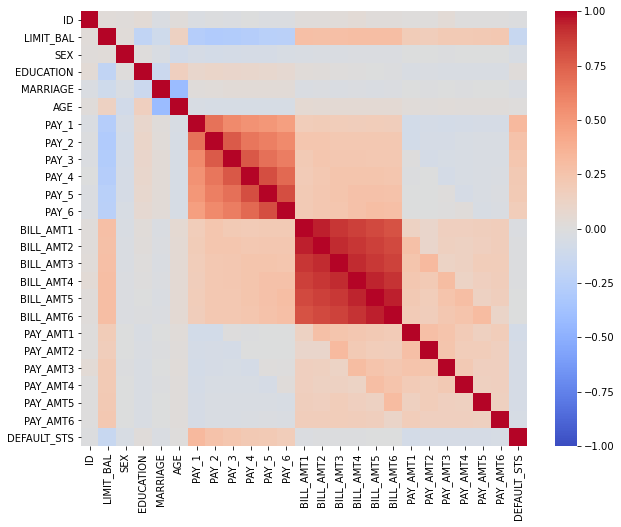

In [65]:
fig, ax = plt.subplots(figsize=(10,8)) 
cm_df = sns.heatmap(rawData.corr(), annot=False, vmin=-1, vmax=1, cmap = "coolwarm", ax=ax)

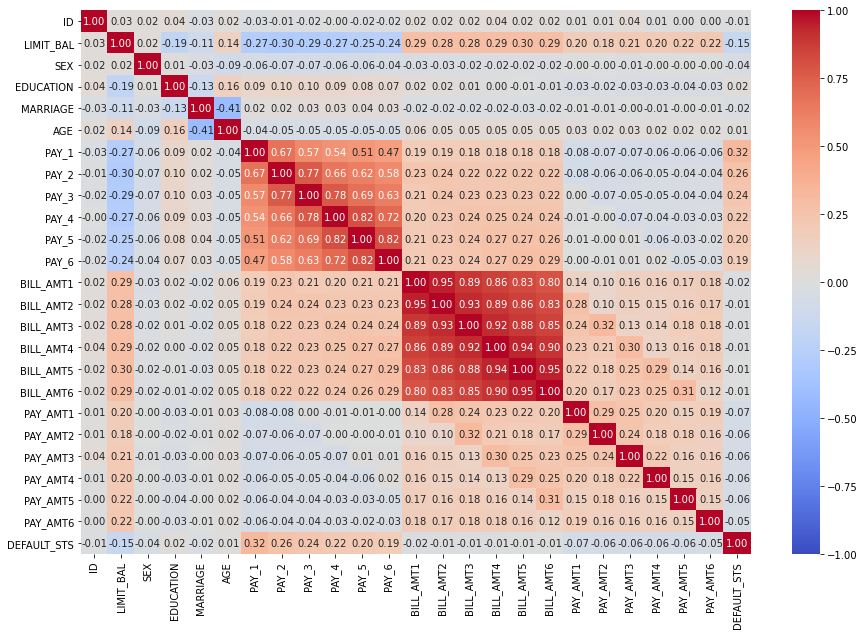

In [67]:
fig, ax = plt.subplots(figsize=(15,10)) 
cm_df = sns.heatmap(rawData.corr(), annot=True, fmt = ".2f", vmin=-1, vmax=1, cmap = "coolwarm", ax=ax)

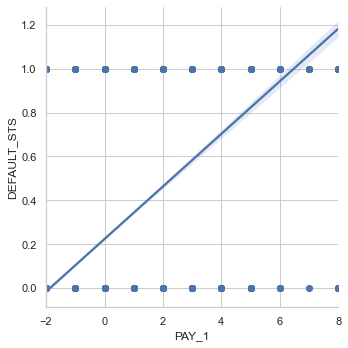

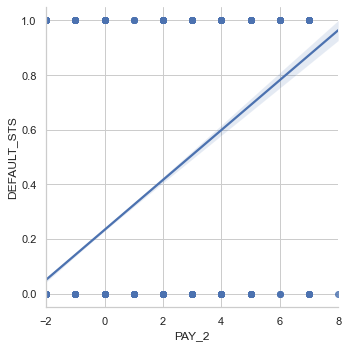

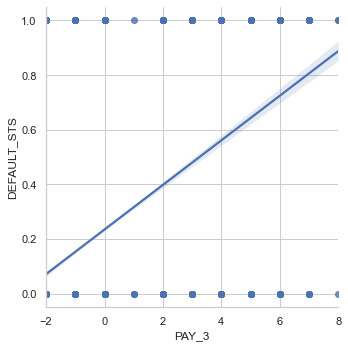

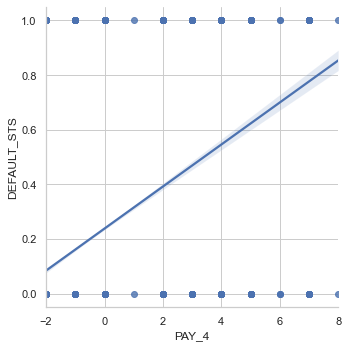

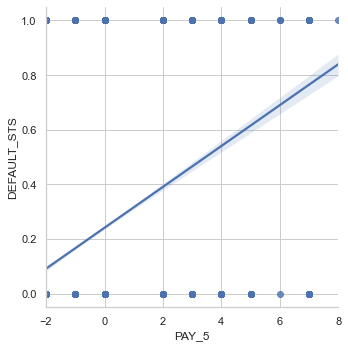

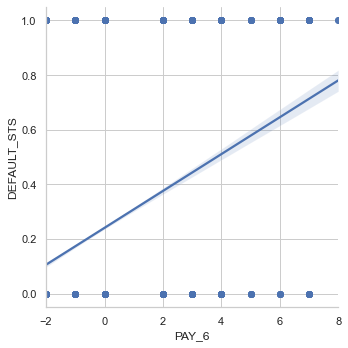

In [239]:
sns.lmplot('PAY_1', 'DEFAULT_STS', data=rawData)
sns.lmplot('PAY_2', 'DEFAULT_STS', data=rawData)
sns.lmplot('PAY_3', 'DEFAULT_STS', data=rawData)
sns.lmplot('PAY_4', 'DEFAULT_STS', data=rawData)
sns.lmplot('PAY_5', 'DEFAULT_STS', data=rawData)
sns.lmplot('PAY_6', 'DEFAULT_STS', data=rawData)
print()

Limit Balance Histogram


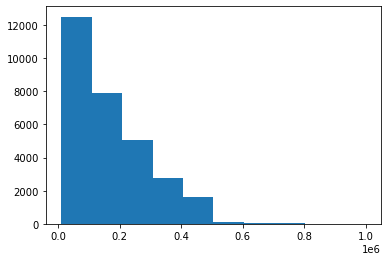

CREDIT_LIMIT
>100K    12498
>200K     7880
>300K     5059
>400K     2759
>500K     1598
>600K      127
>700K       56
>800K       22
>900K        1
Name: CREDIT_LIMIT, dtype: int64
CREDIT_LIMIT
>100K    41.660000
>200K    26.266667
>300K    16.863333
>400K     9.196667
>500K     5.326667
>600K     0.423333
>700K     0.186667
>800K     0.073333
>900K     0.003333
Name: CREDIT_LIMIT, dtype: float64


In [73]:
#histogram using the .hist method of matplotlib
print("Limit Balance Histogram")
plt.hist(rawData['LIMIT_BAL'], bins=10)
plt.show()

limit = pd.cut(rawData.LIMIT_BAL,bins=[1,100000,200000,300000,400000,500000,600000,700000,800000,1000000],labels=['>100K','>200K','>300K','>400K','>500K','>600K','>700K','>800K','>900K'])
rawData.insert(1,'CREDIT_LIMIT',limit)

#Number of transactions per region grouped by transaction type
rawData.pivot_table('LIMIT_BAL', 'CREDIT_LIMIT', aggfunc=len, margins=True)

#Counting the frequency of each labels
credit_count = rawData.groupby('CREDIT_LIMIT')['CREDIT_LIMIT'].count()

#Calculating the sum of the frequency
credit_sum = credit_count.sum()

#Normalizing the frequency
credit_prct = credit_count.apply(lambda x: 100*x / credit_sum)

print(credit_count)
print(credit_prct)

Gender Histogram


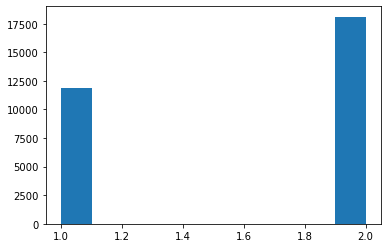

Where 1 = male and 2 = female
SEX
1    11888
2    18112
Name: SEX, dtype: int64
SEX
1    39.626667
2    60.373333
Name: SEX, dtype: float64


In [74]:
#histogram using the .hist method of matplotlib
print("Gender Histogram")
plt.hist(rawData['SEX'])
plt.show()

print('Where 1 = male and 2 = female')
#Counting the frequency of each labels
sex_count = rawData.groupby('SEX')['SEX'].count()

#Calculating the sum of the frequency
sex_sum = sex_count.sum()

#Normalizing the frequency
sex_prct = sex_count.apply(lambda x: 100*x / sex_sum)

print(sex_count)
print(sex_prct)

Level of Education Histogram


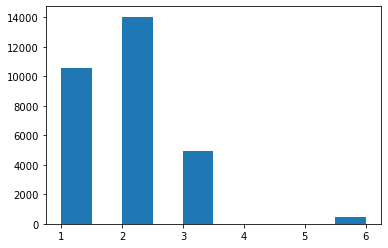

Where 1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others
EDUCATION
1    10585
2    14030
3     4917
6      468
Name: EDUCATION, dtype: int64
EDUCATION
1    35.283333
2    46.766667
3    16.390000
6     1.560000
Name: EDUCATION, dtype: float64


In [75]:
#histogram using the .hist method of matplotlib
print("Level of Education Histogram")
plt.hist(rawData['EDUCATION'])
plt.show()

print('Where 1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others')
#Counting the frequency of each labels
edu_count = rawData.groupby('EDUCATION')['EDUCATION'].count()

#Calculating the sum of the frequency
edu_sum = edu_count.sum()

#Normalizing the frequency
edu_prct = edu_count.apply(lambda x: 100*x / edu_sum)

print(edu_count)
print(edu_prct)

Marriage Status Histogram


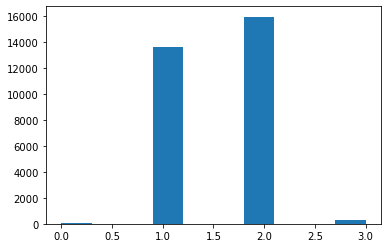

Where 0 = others; 1 = married; 2 = single; 3 = divorce
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64
MARRIAGE
0     0.180000
1    45.530000
2    53.213333
3     1.076667
Name: MARRIAGE, dtype: float64


In [83]:
#histogram using the .hist method of matplotlib
print("Marriage Status Histogram")
plt.hist(rawData['MARRIAGE'])
plt.show()

print('Where 0 = others; 1 = married; 2 = single; 3 = divorce')
#Counting the frequency of each labels
marr_count = rawData.groupby('MARRIAGE')['MARRIAGE'].count()

#Calculating the sum of the frequency
marr_sum = marr_count.sum()

#Normalizing the frequency
marr_prct = marr_count.apply(lambda x: 100*x / marr_sum)

print(marr_count)
print(marr_prct)

Age Histogram


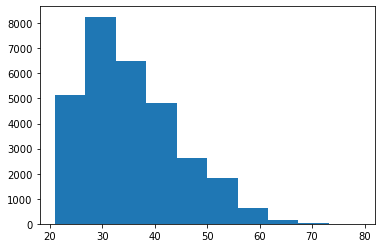

AGE_GROUP
20     9618
30    11238
40     6464
50     2341
60      314
70       25
Name: AGE_GROUP, dtype: int64
AGE_GROUP
20    32.060000
30    37.460000
40    21.546667
50     7.803333
60     1.046667
70     0.083333
Name: AGE_GROUP, dtype: float64


In [76]:
#histogram using the .hist method of matplotlib
print("Age Histogram")
plt.hist(rawData['AGE'], bins=10)
plt.show()

age = pd.cut(rawData.AGE,bins=[19,29,39,49,59,69,79],labels=['20','30','40','50','60','70'])
rawData.insert(1,'AGE_GROUP',age)

#Number of transactions per region grouped by transaction type
rawData.pivot_table('AGE', 'AGE_GROUP', aggfunc=len, margins=True)

#Counting the frequency of each labels
age_count = rawData.groupby('AGE_GROUP')['AGE_GROUP'].count()

#Calculating the sum of the frequency
age_sum = age_count.sum()

#Normalizing the frequency
age_prct = age_count.apply(lambda x: 100*x / age_sum)

print(age_count)
print(age_prct)

Default Payment Status Status Histogram


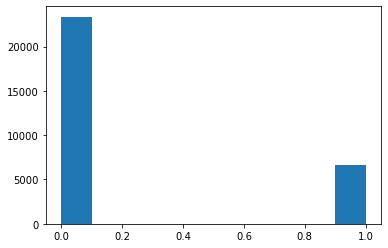

Where 0 = then not default, 1 = then default
DEFAULT_STS
0    23364
1     6636
Name: DEFAULT_STS, dtype: int64
DEFAULT_STS
0    77.88
1    22.12
Name: DEFAULT_STS, dtype: float64


In [77]:
#histogram using the .hist method of matplotlib
print("Default Payment Status Status Histogram")
plt.hist(rawData['DEFAULT_STS'])
plt.show()

print('Where 0 = then not default, 1 = then default')
#Counting the frequency of each labels
ds_count = rawData.groupby('DEFAULT_STS')['DEFAULT_STS'].count()

#Calculating the sum of the frequency
ds_sum = ds_count.sum()

#Normalizing the frequency
ds_prct = ds_count.apply(lambda x: 100*x / ds_sum)

print(ds_count)
print(ds_prct)

Total Defaulted vs Not Defaulted Customers


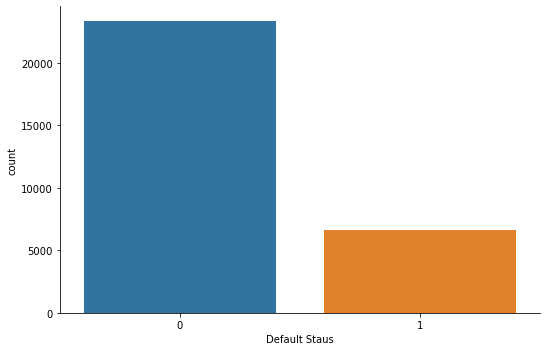

In [99]:
fg = sns.catplot('DEFAULT_STS', data=rawData, kind='count', aspect=1.5)
fg.set_xlabels('Default Staus')
print('Total Defaulted vs Not Defaulted Customers')

In [100]:
c_total = rawData.groupby('DEFAULT_STS')['LIMIT_BAL'].count().reset_index()
c_total.sort_values('LIMIT_BAL', ascending=False)

,DEFAULT_STS,LIMIT_BAL
0,0,23364
1,1,6636


In [101]:
amt_total = rawData.groupby('DEFAULT_STS')['LIMIT_BAL'].sum().reset_index()
amt_total.sort_values('LIMIT_BAL', ascending=False)

,DEFAULT_STS,LIMIT_BAL
0,0,4161122000
1,1,863407680


Defaulted vs Not Defaulted Customers Grouped by Credit Line
Where 0 = then not default, 1 = then default


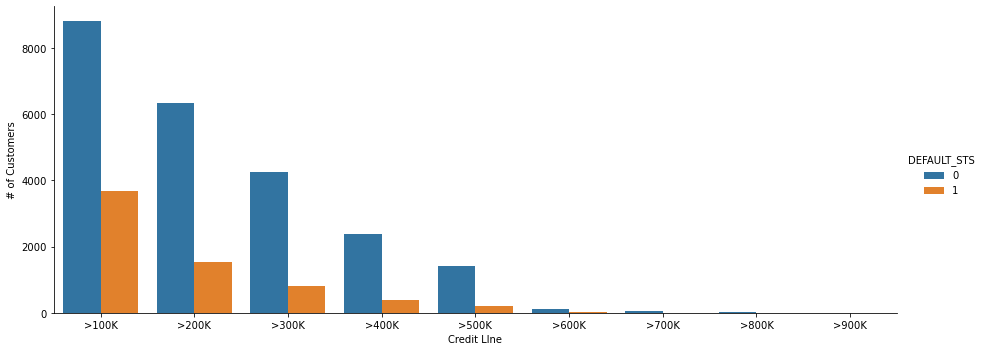

In [78]:
# Instead of a group by, use seaborn to plot the count
lb = sns.catplot('CREDIT_LIMIT', data=rawData, hue='DEFAULT_STS', kind='count', aspect=2.5)
lb.set_xlabels('Credit LIne')
lb.set_ylabels('# of Customers')
print('Defaulted vs Not Defaulted Customers Grouped by Credit Line')
print('Where 0 = then not default, 1 = then default')

In [103]:
rawData.groupby(['CREDIT_LIMIT', 'DEFAULT_STS']).count()

ID  AGE_GROUP  LIMIT_BAL     SEX  EDUCATION  \
CREDIT_LIMIT DEFAULT_STS                                                    
>100K        0            8814.0     8814.0     8814.0  8814.0     8814.0   
             1            3684.0     3684.0     3684.0  3684.0     3684.0   
>200K        0            6345.0     6345.0     6345.0  6345.0     6345.0   
             1            1535.0     1535.0     1535.0  1535.0     1535.0   
>300K        0            4247.0     4247.0     4247.0  4247.0     4247.0   
             1             812.0      812.0      812.0   812.0      812.0   
>400K        0            2371.0     2371.0     2371.0  2371.0     2371.0   
             1             388.0      388.0      388.0   388.0      388.0   
>500K        0            1404.0     1404.0     1404.0  1404.0     1404.0   
             1             194.0      194.0      194.0   194.0      194.0   
>600K        0             110.0      110.0      110.0   110.0      110.0   
             1              17.0       17.0       17.0    17.0       17.0   
>700K        0              53.0       53.0       53.0    53.0       53.0   
             1               3.0        3.0        3.0     3.0        3.0   
>800K        0              19.0       19.0       19.0    19.0       19.0   
             1               3.0        3.0        3.0     3.0        3.0   
>900K        0               1.0        1.0        1.0     1.0        1.0   
             1               NaN        NaN        NaN     NaN        NaN   

                          MARRIAGE     AGE   PAY_1   PAY_2   PAY_3  ...  \
CREDIT_LIMIT DEFAULT_STS                                            ...   
>100K        0              8814.0  8814.0  8814.0  8814.0  8814.0  ...   
             1              3684.0  3684.0  3684.0  3684.0  3684.0  ...   
>200K        0              6345.0  6345.0  6345.0  6345.0  6345.0  ...   
             1              1535.0  1535.0  1535.0  1535.0  1535.0  ...   
>300K        0              4247.0  4247.0  4247.0  4247.0  4247.0  ...   
             1               812.0   812.0   812.0   812.0   812.0  ...   
>400K        0              2371.0  2371.0  2371.0  2371.0  2371.0  ...   
             1               388.0   388.0   388.0   388.0   388.0  ...   
>500K        0              1404.0  1404.0  1404.0  1404.0  1404.0  ...   
             1               194.0   194.0   194.0   194.0   194.0  ...   
>600K        0               110.0   110.0   110.0   110.0   110.0  ...   
             1                17.0    17.0    17.0    17.0    17.0  ...   
>700K        0                53.0    53.0    53.0    53.0    53.0  ...   
             1                 3.0     3.0     3.0     3.0     3.0  ...   
>800K        0                19.0    19.0    19.0    19.0    19.0  ...   
             1                 3.0     3.0     3.0     3.0     3.0  ...   
>900K        0                 1.0     1.0     1.0     1.0     1.0  ...   
             1                 NaN     NaN     NaN     NaN     NaN  ...   

                          BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
CREDIT_LIMIT DEFAULT_STS                                               
>100K        0               8814.0     8814.0     8814.0     8814.0   
             1               3684.0     3684.0     3684.0     3684.0   
>200K        0               6345.0     6345.0     6345.0     6345.0   
             1               1535.0     1535.0     1535.0     1535.0   
>300K        0               4247.0     4247.0     4247.0     4247.0   
             1                812.0      812.0      812.0      812.0   
>400K        0               2371.0     2371.0     2371.0     2371.0   
             1                388.0      388.0      388.0      388.0   
>500K        0               1404.0     1404.0     1404.0     1404.0   
             1                194.0      194.0      194.0      194.0   
>600K        0                110.0      110.0      110.0      110.0   
             1                 17.0       17.0      

In [102]:
rawData.groupby(['CREDIT_LIMIT', 'DEFAULT_STS']).sum()

ID     LIMIT_BAL      SEX  EDUCATION  \
CREDIT_LIMIT DEFAULT_STS                                                  
>100K        0            128737536.0  4.788920e+08  13919.0    18103.0   
             1             55034461.0  1.807600e+08   5720.0     7573.0   
>200K        0             96324749.0  1.009190e+09  10504.0    11799.0   
             1             22661168.0  2.384300e+08   2420.0     2728.0   
>300K        0             65996896.0  1.064270e+09   7037.0     7333.0   
             1             11804613.0  2.026600e+08   1314.0     1359.0   
>400K        0             36379139.0  8.379700e+08   3786.0     3880.0   
             1              5533269.0  1.372077e+08    617.0      611.0   
>500K        0             21697548.0  6.610500e+08   2181.0     2189.0   
             1              2658596.0  9.083000e+07    291.0      290.0   
>600K        0              1710789.0  6.044000e+07    174.0      178.0   
             1               271825.0  9.420000e+06     26.0       35.0   
>700K        0               816422.0  3.420000e+07     82.0       78.0   
             1                30676.0  1.930000e+06      6.0        4.0   
>800K        0               310906.0  1.411000e+07     28.0       38.0   
             1                44209.0  2.170000e+06      5.0        5.0   
>900K        0                 2198.0  1.000000e+06      2.0        1.0   
             1                    NaN           NaN      NaN        NaN   

                          MARRIAGE       AGE   PAY_1   PAY_2   PAY_3   PAY_4  \
CREDIT_LIMIT DEFAULT_STS                                                       
>100K        0             14298.0  301648.0   768.0   552.0   269.0  -359.0   
             1              5789.0  127430.0  3506.0  3094.0  2749.0  2335.0   
>200K        0              9880.0  222932.0 -1780.0 -2595.0 -2620.0 -2843.0   
             1              2321.0   55532.0   740.0   398.0   250.0    30.0   
>300K        0              6404.0  154340.0 -1830.0 -2461.0 -2479.0 -2527.0   
             1              1165.0   30576.0   159.0  -148.0  -233.0  -277.0   
>400K        0              3519.0   87341.0 -1247.0 -1565.0 -1559.0 -1622.0   
             1               568.0   14770.0    19.0  -219.0  -255.0  -292.0   
>500K        0              2033.0   54053.0  -765.0  -896.0  -919.0  -871.0   
             1               268.0    7862.0    -8.0   -96.0  -111.0  -107.0   
>600K        0               166.0    4302.0   -52.0   -52.0   -46.0   -49.0   
             1                21.0     687.0    16.0    13.0     7.0     3.0   
>700K        0                89.0    2020.0   -23.0   -23.0   -22.0   -26.0   
             1                 5.0     104.0     2.0     2.0    -1.0    -1.0   
>800K        0                26.0     806.0    -6.0   -14.0   -13.0   -11.0   
             1                 3.0     115.0     0.0    -3.0    -3.0    -2.0   
>900K        0                 1.0      47.0     0.0     0.0     0.0    -1.0   
             1                 NaN       NaN     NaN     NaN     NaN     NaN   

                          ...    BILL_AMT3    BILL_AMT4    BILL_AMT5  \
CREDIT_LIMIT DEFAULT_STS  ...                                          
>100K        0            ...  246518392.0  216477164.0  196215753.0   
             1            ...  103389141.0   95261592.0   87464765.0   
>200K        0            ...  313388739.0  288637960.0  270341589.0   
             1            ...   84965546.0   79658249.0   76845396.0   
>300K        0            ...  249829511.0  230047521.0  216240029.0   
             1            ...   53415020.0   50105337.0   46298778.0   
>400K        0            ...  152251260.0  143037196.0  132944112.0   
             1            ...   30757842.0   28397337.0   27404951.0   
>500K        0            ...  122313788.0  116123091.0  107882409.0   
             1            ...   20791654.0   19554432.0   19108459.0   
>600K        0            ...   15085481.0   13940565.0   12847910.0 

Default vs No Default Payment Grouped by Sex
Where 1 = male and 2 = female


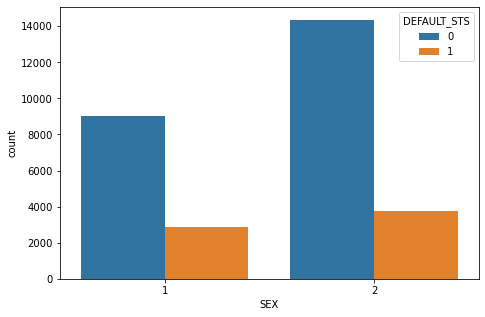

In [131]:
print('Default vs No Default Payment Grouped by Sex')
plt.figure(figsize=(7.5,5))
sns.countplot(x=rawData['SEX'],hue=rawData['DEFAULT_STS'])
plt.show()

In [132]:
print('Where 1 = male and 2 = female')

rawData.groupby(['SEX', 'DEFAULT_STS'])['DEFAULT_STS'].count()

Where 1 = male and 2 = female


SEX  DEFAULT_STS
1    0               9015
     1               2873
2    0              14349
     1               3763
Name: DEFAULT_STS, dtype: int64

Default vs No Default Payment Grouped by Level of Education


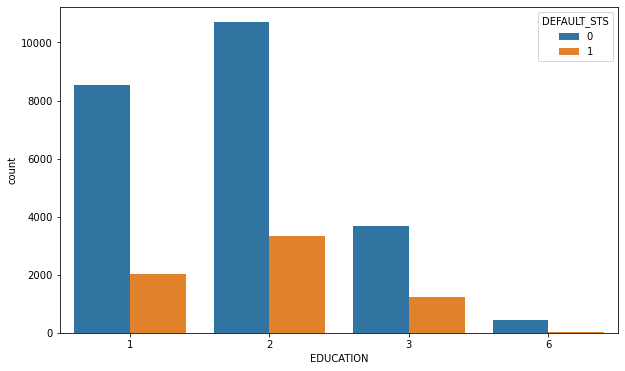

In [143]:
print('Default vs No Default Payment Grouped by Level of Education')
plt.figure(figsize=(10,6))
sns.countplot(x=rawData['EDUCATION'],hue=rawData['DEFAULT_STS'])
plt.show()

In [145]:
print('Where 1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others')

rawData.groupby(['EDUCATION', 'DEFAULT_STS'])['EDUCATION'].count()

Where 1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others


EDUCATION  DEFAULT_STS
1          0               8549
           1               2036
2          0              10700
           1               3330
3          0               3680
           1               1237
6          0                435
           1                 33
Name: EDUCATION, dtype: int64

Default vs No Default Payment Grouped by Marital Status


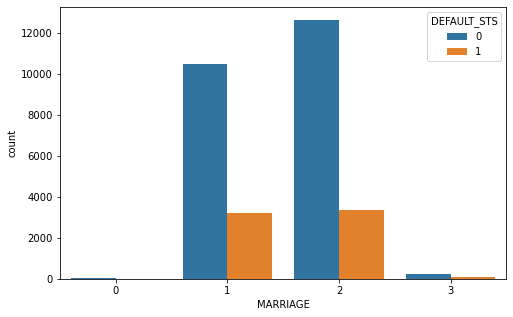

In [148]:
print('Default vs No Default Payment Grouped by Marital Status')
plt.figure(figsize=(8,5))
sns.countplot(x=rawData['MARRIAGE'],hue=rawData['DEFAULT_STS'])
plt.show()

In [149]:
print('Where 0 = others; 1 = married; 2 = single; 3 = divorce')

rawData.groupby(['MARRIAGE', 'DEFAULT_STS'])['MARRIAGE'].count()

Where 0 = others; 1 = married; 2 = single; 3 = divorce


MARRIAGE  DEFAULT_STS
0         0                 49
          1                  5
1         0              10453
          1               3206
2         0              12623
          1               3341
3         0                239
          1                 84
Name: MARRIAGE, dtype: int64

Default vs No Default Payment Grouped by Age Group


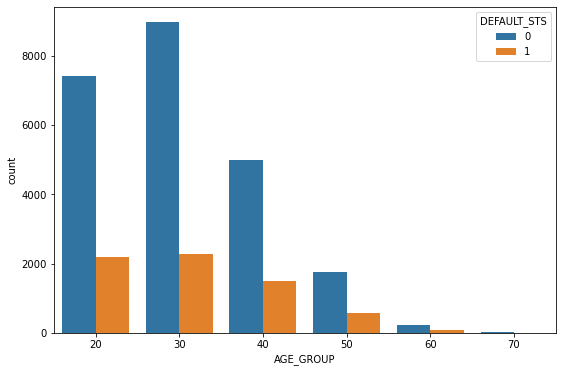

In [163]:
print('Default vs No Default Payment Grouped by Age Group')
plt.figure(figsize=(9,6))
sns.countplot(x=rawData['AGE_GROUP'],hue=rawData['DEFAULT_STS'])
plt.show()

In [151]:
rawData.groupby(['AGE_GROUP', 'DEFAULT_STS'])['MARRIAGE'].count()

AGE_GROUP  DEFAULT_STS
20         0              7421
           1              2197
30         0              8962
           1              2276
40         0              4979
           1              1485
50         0              1759
           1               582
60         0               225
           1                89
70         0                18
           1                 7
Name: MARRIAGE, dtype: int64

Default Status by Credit Line


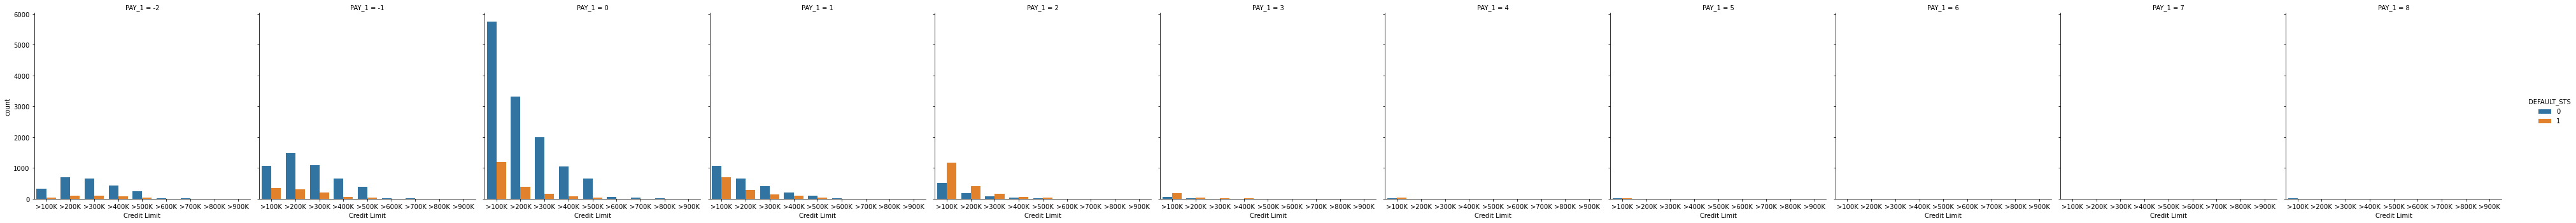

In [104]:
fg=sns.catplot('CREDIT_LIMIT', data=rawData, kind='count', hue='DEFAULT_STS', col='PAY_1', hue_order=range(0,2))
fg.set_xlabels('Credit Limit')
print('Default Status by Credit Line')

History of Past Payment


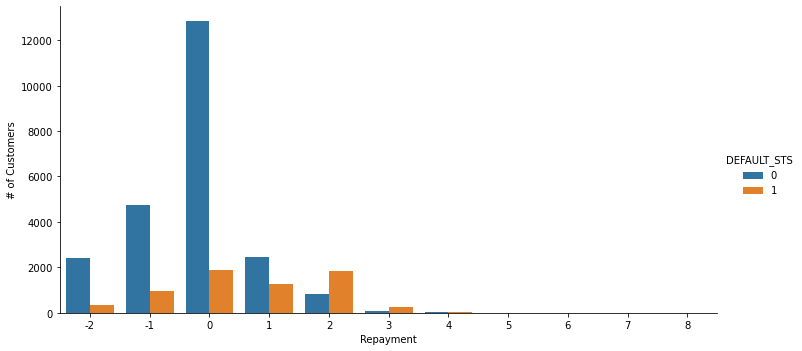

In [105]:
# Instead of a group by, use seaborn to plot the count
lb = sns.catplot('PAY_1', data=rawData, hue='DEFAULT_STS', kind='count', aspect=2)
lb.set_xlabels('Repayment')
lb.set_ylabels('# of Customers')
print('History of Past Payment')

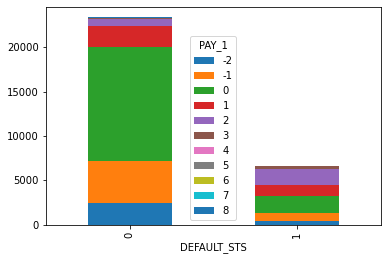

In [106]:
rawData.groupby(['DEFAULT_STS','PAY_1']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Default Status by Level of Education


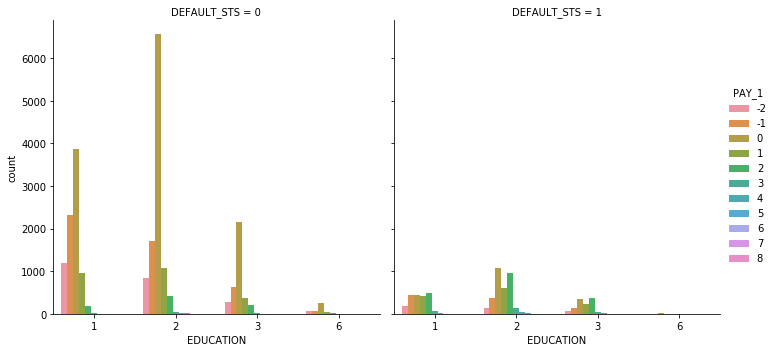

In [66]:
fg=sns.factorplot('EDUCATION', data=rawData, kind='count', hue='PAY_1', col='DEFAULT_STS', hue_order=range(-2,9))
fg.set_xlabels('EDUCATION')
print('Default Status by Level of Education')

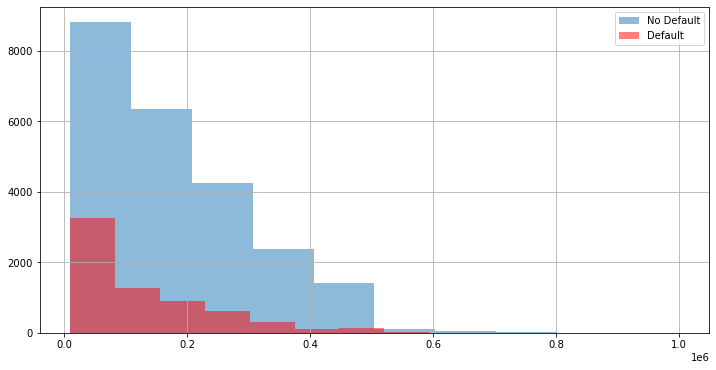

In [90]:
plt.figure(figsize=(12,6))
rawData[rawData['DEFAULT_STS']==0]['LIMIT_BAL'].hist(bins=10,alpha=0.5,label='No Default')
rawData[rawData['DEFAULT_STS']==1]['LIMIT_BAL'].hist(color='red',bins=10,alpha=0.5,label='Default')
plt.legend()
plt.show()

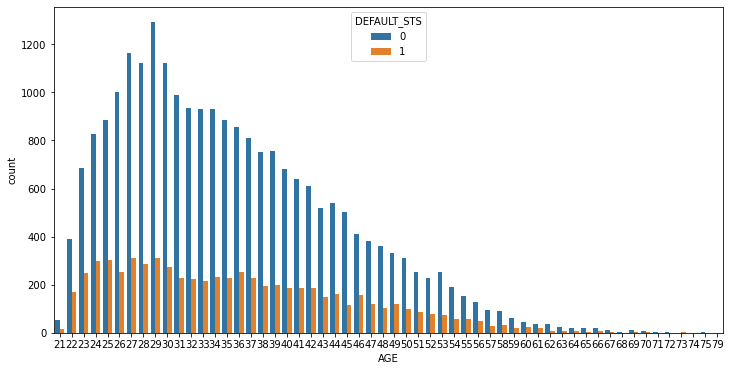

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(x=rawData['AGE'],hue=rawData['DEFAULT_STS'])
from sklearn import tree
plt.show()

In [153]:
rawData.pivot_table('LIMIT_BAL', 'AGE_GROUP', 'DEFAULT_STS', aggfunc=np.sum, margins=True)

DEFAULT_STS,0,1,All
AGE_GROUP,,,
20,988380000,206260000,1194640000
30,1862870000,351030000,2213900000
40,956172000,212427680,1168599680
50,307420000,76290000,383710000
60,42340000,15870000,58210000
70,3940000,1530000,5470000
All,4161122000,863407680,5024529680


In [157]:
rawData.pivot_table('LIMIT_BAL', 'MARRIAGE', 'DEFAULT_STS', aggfunc=np.sum, margins=True)

DEFAULT_STS,0,1,All
MARRIAGE,,,
0,6570000,610000,7180000
1,2029562000,459120000,2488682000
2,2099460000,397527680,2496987680
3,25530000,6150000,31680000
All,4161122000,863407680,5024529680


In [158]:
rawData.pivot_table('LIMIT_BAL', 'EDUCATION', 'DEFAULT_STS', aggfunc=np.sum, margins=True)

DEFAULT_STS,0,1,All
EDUCATION,,,
1,1891250000,362890000,2254140000
2,1688356000,374930000,2063286000
3,500990000,121257680,622247680
6,80526000,4330000,84856000
All,4161122000,863407680,5024529680


In [159]:
rawData.pivot_table('LIMIT_BAL', 'SEX', 'DEFAULT_STS', aggfunc=np.sum, margins=True)

DEFAULT_STS,0,1,All
SEX,,,
1,1582226000,361697680,1943923680
2,2578896000,501710000,3080606000
All,4161122000,863407680,5024529680


Historical Payment Histogram


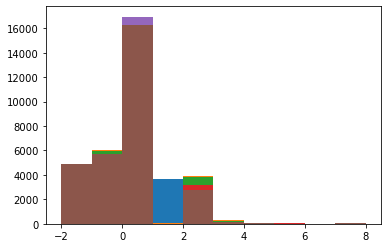

In [194]:
#histogram using the .hist method of matplotlib
print("Historical Payment Histogram")
plt.hist(rawData['PAY_1'])
plt.hist(rawData['PAY_2'])
plt.hist(rawData['PAY_3'])
plt.hist(rawData['PAY_4'])
plt.hist(rawData['PAY_5'])
plt.hist(rawData['PAY_6'])
plt.show()

In [65]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1) = plt.subplots(1, sharex=False, figsize=(10,5))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(rawData.loc[rawData[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(rawData[col_name], order=sorted(rawData[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(rawData, hue = 'DEFAULT_STS', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='DEFAULT_STS', data=rawData, order=sorted(rawData[col_name].unique()) )
     
    plt.tight_layout()

C:\Users\liloa\.conda\envs\utda-env\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


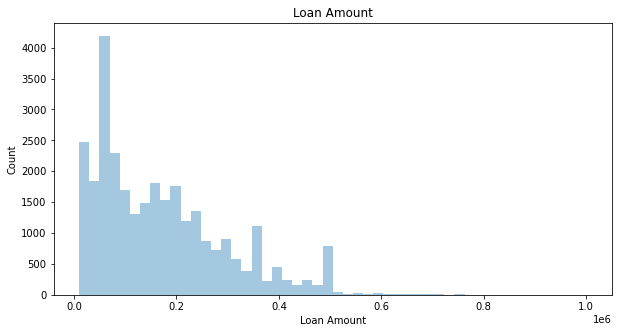

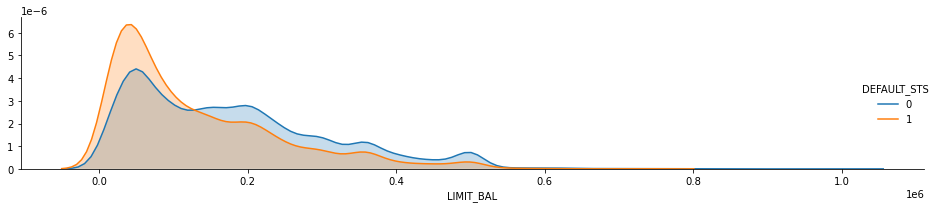

In [66]:
plot_var('LIMIT_BAL', 'Loan Amount', continuous=True)

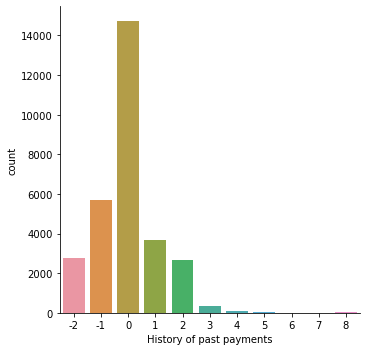

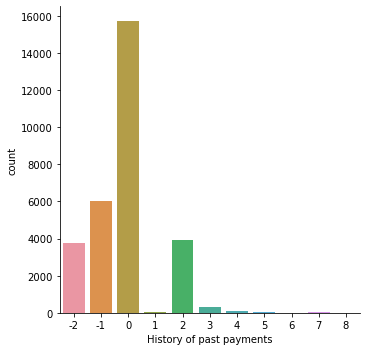

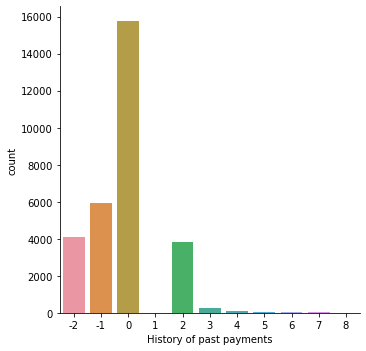

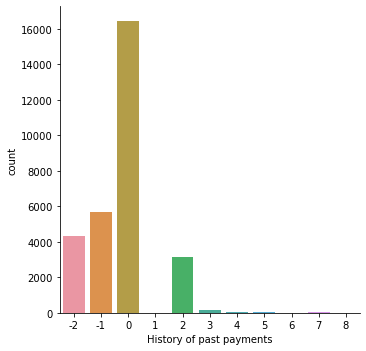

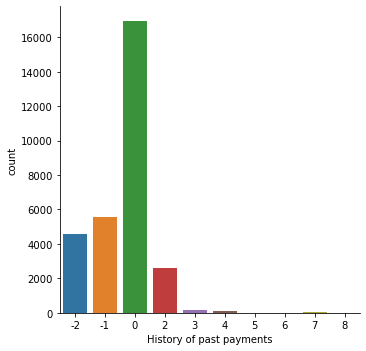

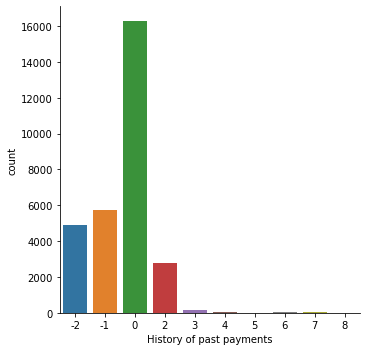

In [198]:
pay1 = sns.factorplot('PAY_1', data=rawData, kind='count').set_xlabels('History of past payments')
pay2 = sns.factorplot('PAY_2', data=rawData, kind='count').set_xlabels('History of past payments')
pay3 = sns.factorplot('PAY_3', data=rawData, kind='count').set_xlabels('History of past payments')
pay4 = sns.factorplot('PAY_4', data=rawData, kind='count').set_xlabels('History of past payments')
pay5 = sns.factorplot('PAY_5', data=rawData, kind='count').set_xlabels('History of past payments')
pay6 = sns.factorplot('PAY_6', data=rawData, kind='count').set_xlabels('History of past payments')

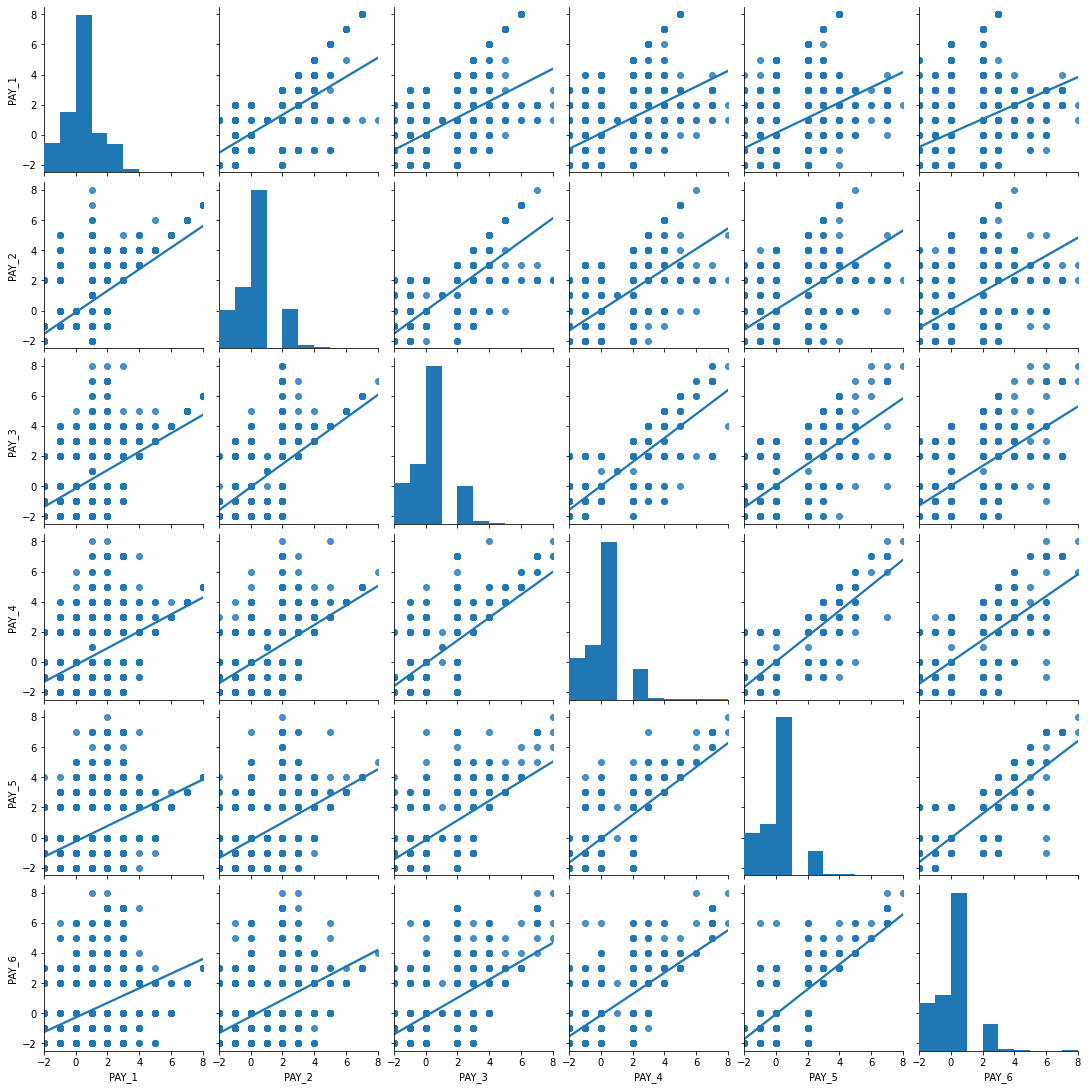

In [179]:
pymt = rawData.loc[:,'PAY_1':'PAY_6']
sns.pairplot(pymt, kind="reg")
plt.show()

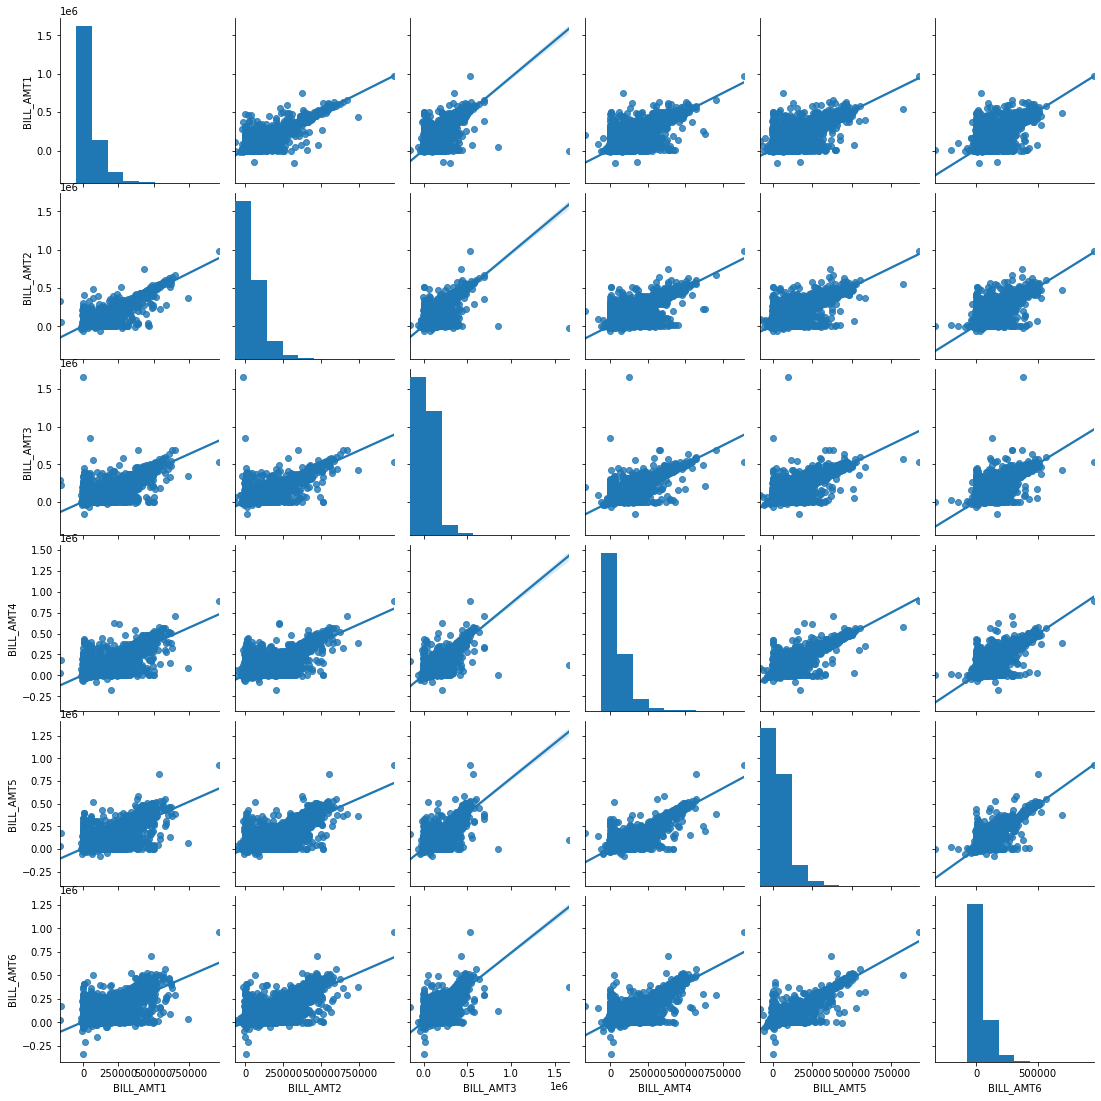

In [181]:
billamt = rawData.loc[:,'BILL_AMT1':'BILL_AMT6']
sns.pairplot(billamt, kind="reg")
plt.show()

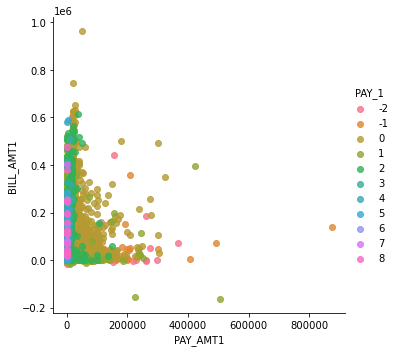

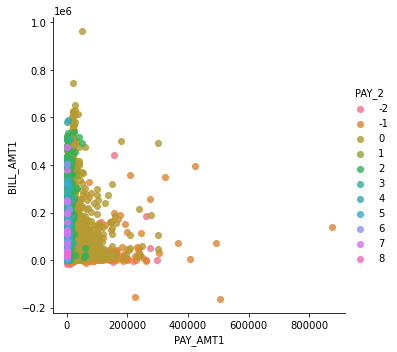

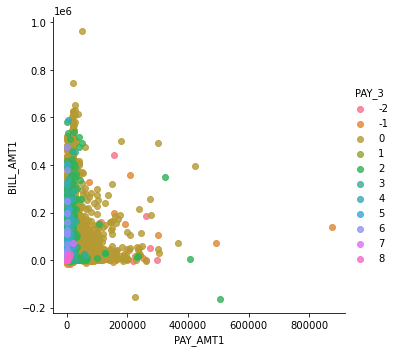

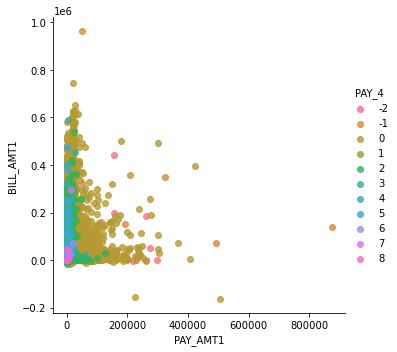

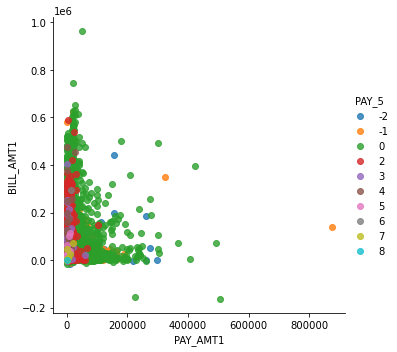

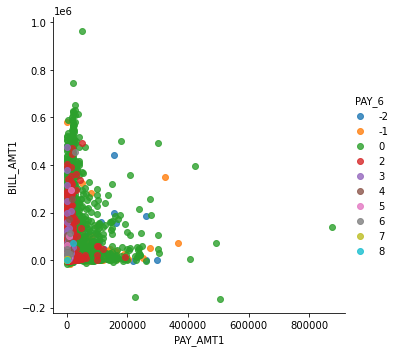

In [188]:
sns.lmplot("PAY_AMT1", "BILL_AMT1", rawData, hue="PAY_1", fit_reg=False)
sns.lmplot("PAY_AMT1", "BILL_AMT1", rawData, hue="PAY_2", fit_reg=False)
sns.lmplot("PAY_AMT1", "BILL_AMT1", rawData, hue="PAY_3", fit_reg=False)
sns.lmplot("PAY_AMT1", "BILL_AMT1", rawData, hue="PAY_4", fit_reg=False)
sns.lmplot("PAY_AMT1", "BILL_AMT1", rawData, hue="PAY_5", fit_reg=False)
sns.lmplot("PAY_AMT1", "BILL_AMT1", rawData, hue="PAY_6", fit_reg=False)

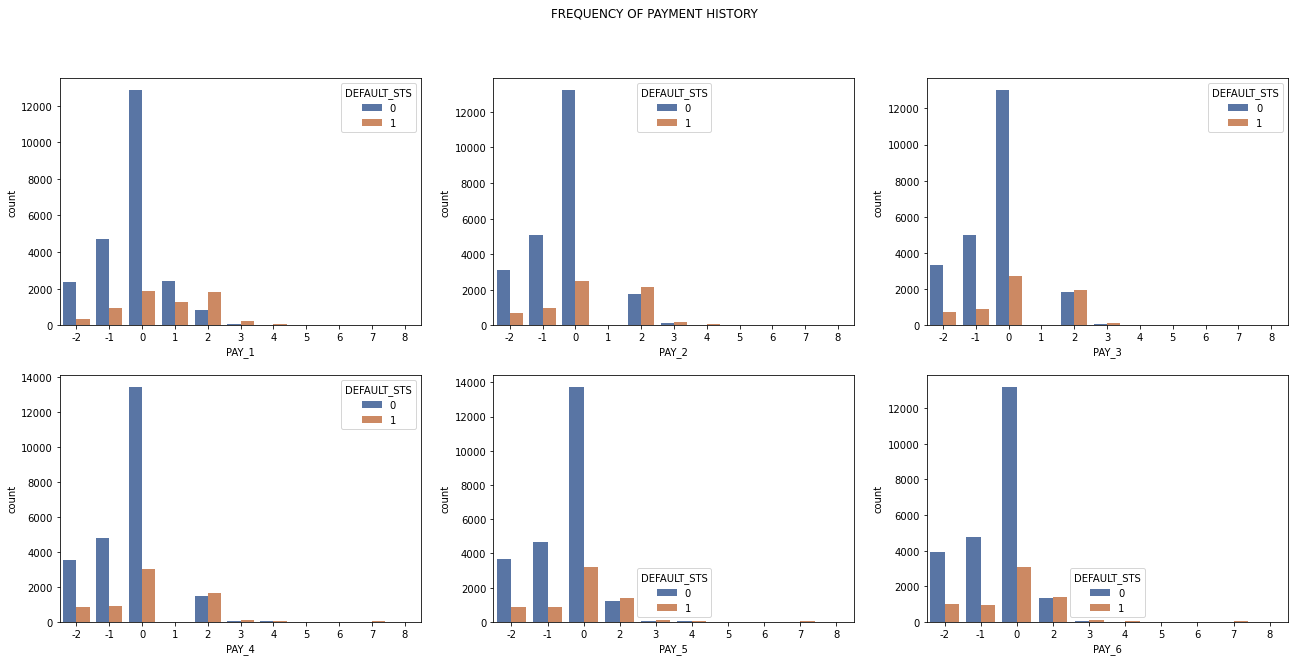

In [190]:
freq = rawData[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'DEFAULT_STS']]

f, axes = plt.subplots(2, 3, figsize=(22, 10), facecolor='white')
f.suptitle('FREQUENCY OF PAYMENT HISTORY')
ax1 = sns.countplot(x="PAY_1", hue="DEFAULT_STS", data=freq, palette="deep", ax=axes[0,0])
ax2 = sns.countplot(x="PAY_2", hue="DEFAULT_STS", data=freq, palette="deep", ax=axes[0,1])
ax3 = sns.countplot(x="PAY_3", hue="DEFAULT_STS", data=freq, palette="deep", ax=axes[0,2])
ax4 = sns.countplot(x="PAY_4", hue="DEFAULT_STS", data=freq, palette="deep", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_5", hue="DEFAULT_STS", data=freq, palette="deep", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_6", hue="DEFAULT_STS", data=freq, palette="deep", ax=axes[1,2]);

Historical Payment 1 Histogram


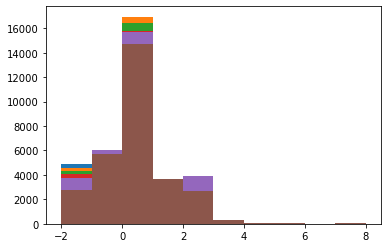

In [196]:
#histogram using the .hist method of matplotlib
print("Historical Payment 1 Histogram")
plt.hist(rawData['PAY_6'])
plt.hist(rawData['PAY_5'])
plt.hist(rawData['PAY_4'])
plt.hist(rawData['PAY_3'])
plt.hist(rawData['PAY_2'])
plt.hist(rawData['PAY_1'])
plt.show()

Historical Payment 1 Histogram


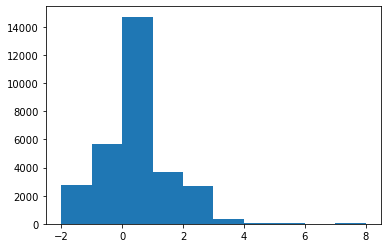

In [195]:
#histogram using the .hist method of matplotlib
print("Historical Payment 1 Histogram")
plt.hist(rawData['PAY_1'])
plt.show()